# Data Story 8 and 9

This notebook is a part of my 8th day in analyzing datasets.

Let's jump straight to some Air Quality.

In [43]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/stations.csv


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
%matplotlib inline

In [45]:
#reading in the data
data = pd.read_csv('../input/air-quality-data-in-india/city_day.csv')
data.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN


In [46]:
# creating a new year column
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year

# Report of Air Quality Data in India

In [47]:
report = ProfileReport(data)
report

# How AQI(air quality index) is distributed?

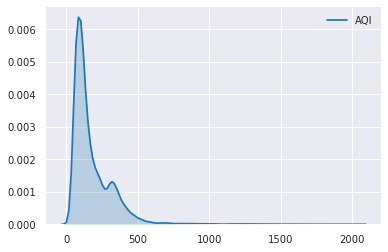

In [48]:
sns.set_style("darkgrid")
sns.kdeplot(data=data['AQI'],label="AQI" ,shade=True)

# Which city has lowest AQI?

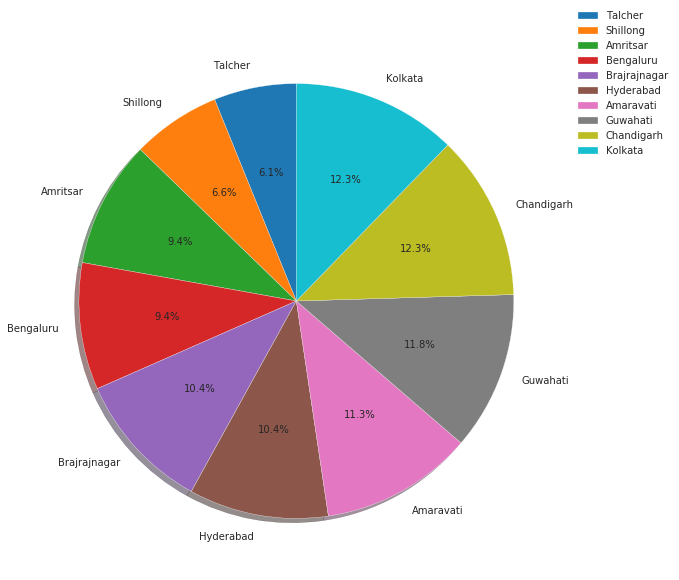

In [49]:
aqi = data.groupby('City')['AQI'].min().reset_index()
aqi  = aqi.sort_values("AQI")
aqi = aqi.head(10)
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(aqi['AQI'].tolist(), labels=aqi['City'].tolist(), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()

# Cities with lowest AQI per year

In [50]:
perc = data.loc[:,["year","City",'AQI']]
perc['mean_AQI'] = perc.groupby([perc.City,perc.year])['AQI'].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("year",ascending = False)
top_brand = ['Talcher','Amritsar','Brajrajnagar'] 
perc = perc.loc[perc['City'].isin(top_brand)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig=px.bar(perc,x='City', y="mean_AQI", animation_frame="year", 
           animation_group="City", color="City", hover_name="City")
fig.show()

# Which City has highest AQI?

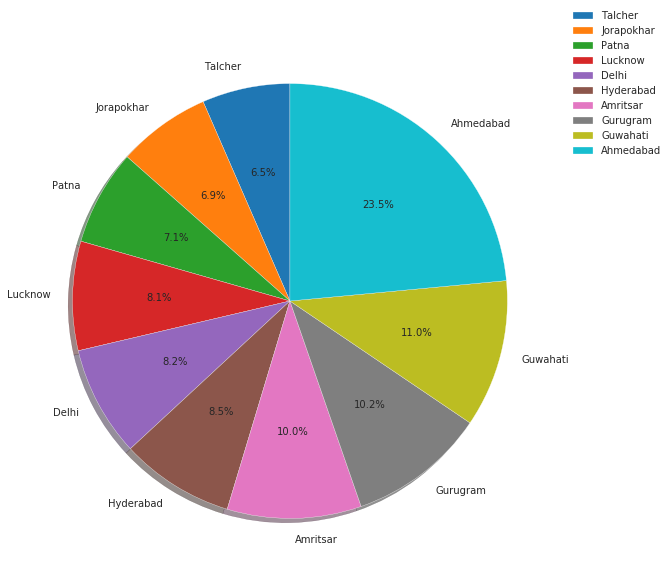

In [51]:
aqi = data.groupby('City')['AQI'].max().reset_index()
aqi  = aqi.sort_values("AQI")
aqi = aqi.tail(10)
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(aqi['AQI'].tolist(), labels=aqi['City'].tolist(), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()

# Cities with highest AQI per year

In [52]:
perc = data.loc[:,["year","City",'AQI']]
perc['mean_AQI'] = perc.groupby([perc.City,perc.year])['AQI'].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("year",ascending = False)
top_brand = ['Hyderabad','Amritsar','Gurugram','Guwahati',"Ahmedabad"] 
perc = perc.loc[perc['City'].isin(top_brand)]
perc = perc.sort_values(by="year")
perc = perc.fillna(100)
fig=px.bar(perc,x='City', y="mean_AQI", animation_frame="year", 
           animation_group="City", color="City", hover_name="City")
fig.show()

I will end my today's analysis here. Tomorrow I will continue with analysing the cities with highest AQI because they are the ones that need more attention and need to be improved.

I will also try to see if there was any decrease noticed in AQI that may provide insights about future steps to be taken.

See ya.

# Looking at each of the cities with highest AQI

In [53]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-01-03,NaN,NaN,NaN,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-01-04,NaN,NaN,NaN,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-01-05,NaN,NaN,NaN,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015


Let's first group the city columns and take the mean AQI values

In [54]:
data1 = data['AQI'].dropna()
top_10_city = data.loc[data1.index].groupby('City')['AQI'].mean().reset_index()
top_10_city.sort_values('AQI', ascending=False, inplace=True)
top_10_city.head(10)

,City,AQI
0,Ahmedabad,473.912281
9,Delhi,262.255086
18,Patna,248.270153
10,Gurugram,230.518600
16,Lucknow,222.881833
20,Talcher,179.990506
14,Jorapokhar,162.746009
11,Guwahati,156.486683
15,Kolkata,151.535714
6,Brajrajnagar,151.519345


# Top 10 cities with highest AQI

In [55]:
top_cities = top_10_city.head(10)['City'].tolist()
top_cities

['Ahmedabad',
 'Delhi',
 'Patna',
 'Gurugram',
 'Lucknow',
 'Talcher',
 'Jorapokhar',
 'Guwahati',
 'Kolkata',
 'Brajrajnagar']

Now there is one interesting thing to notice. Talcher is actually the city that once had the lowest AQI in the whole dataset in the span of 5 years. 

But when taken mean data it comes in one of the cities with highest AQI.

What this signifies is it's AQI value is increasing rapidly. Let's try to visualize its growth using a line plot over the years.

# Talcher AQI map

In [56]:
talcher = data[data['City']=='Talcher']
data_by_year = talcher.groupby('year')['AQI'].mean().reset_index().dropna()
data_by_year.head()

,year,AQI
1,2018,185.744770
2,2019,169.023102
3,2020,201.633333


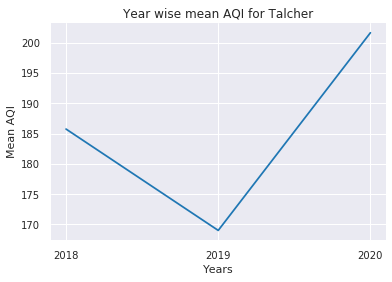

In [57]:
plt.plot(data_by_year['year'], data_by_year['AQI'])
plt.xticks(data_by_year['year'].tolist())
plt.title('Year wise mean AQI for Talcher')
plt.xlabel('Years')
plt.ylabel('Mean AQI')
plt.show()

The situation for talcher is not very good because it's AQI value saw a huge increase in 2020

# Brajrajnagar AQI map

In [58]:
braj = data[data['City']=='Brajrajnagar']
data_by_year = braj.groupby('year')['AQI'].mean().reset_index().dropna()
data_by_year.head()

,year,AQI
0,2017,247.600000
1,2018,154.996154
2,2019,148.400621
3,2020,140.762500


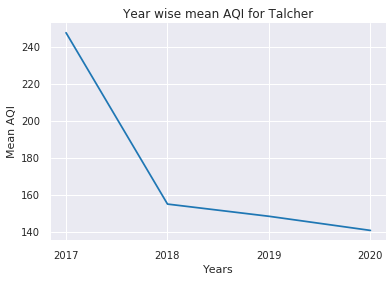

In [59]:
plt.plot(data_by_year['year'], data_by_year['AQI'])
plt.xticks(data_by_year['year'].tolist())
plt.title('Year wise mean AQI for Talcher')
plt.xlabel('Years')
plt.ylabel('Mean AQI')
plt.show()

Brajrajnagar may have come in top 10 cities in case of the mean but it's showing  huge progress in the last couple of years

Checking for all cities

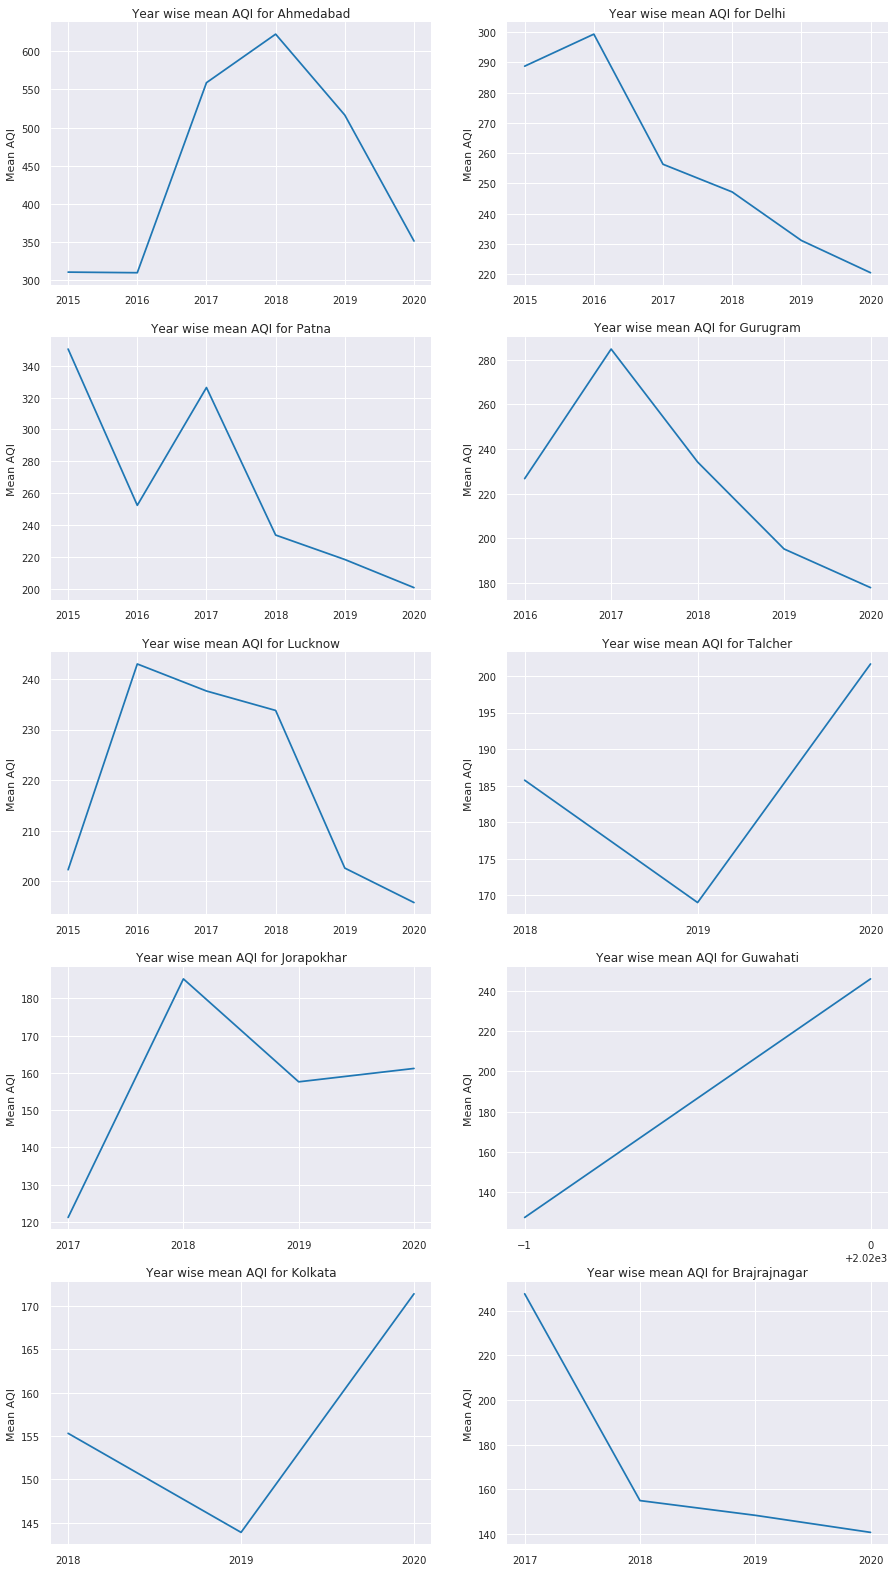

In [60]:
fig = plt.figure(figsize=(15,28))
for city,num in zip(top_cities, range(1,11)):
    df = data[data['City']==city]
    data_by_year = df.groupby('year')['AQI'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.plot(data_by_year['year'], data_by_year['AQI'])
    ax.set_xticks(data_by_year['year'].tolist())
    ax.set_title('Year wise mean AQI for {}'.format(city))
    ax.set_ylabel('Mean AQI')

Things aren't looking good for Kolkata, Talcher and Guwahati. All other cities are improving their AQI.

I have invested enough time into understanding the AQI for each city.

Now let's move on to check the variation of the other variables(toxic factors)

# Which city has highest NO?

In [61]:
data.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015


Now as we can see there are a lot of null values.

One logical thing to do is to replace the NaN with 0.0 i.e, their value was not detected in that particular city.

In [62]:
#imputing null values with 0.0
df = data.fillna(0.0)

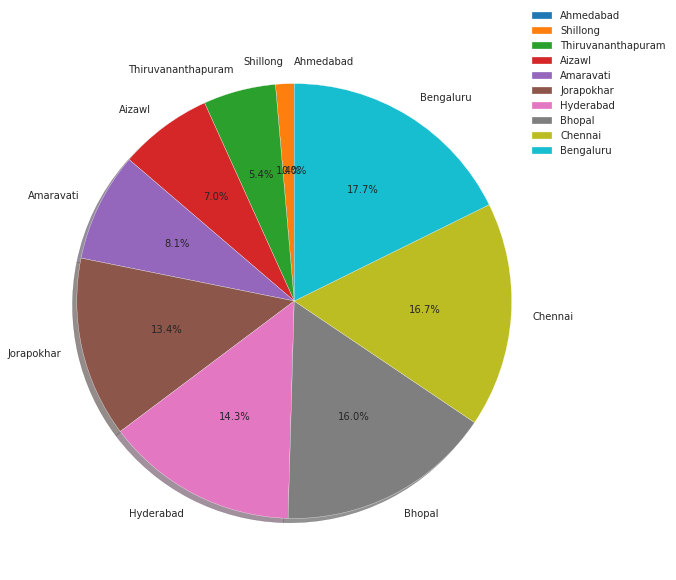

In [63]:
no = df.groupby('City')['NO'].mean().reset_index()
no  = no.sort_values("NO")
no = no.head(10)
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(no['NO'].tolist(), labels=no['City'].tolist(), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()

In [64]:
perc = df.loc[:,["year","City",'NO']]
perc['mean_NO'] = perc.groupby([perc.City,perc.year])['NO'].transform('mean')
perc.drop('NO', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("year",ascending = False)
top_brand = ['Hyderabad','Bhopal','Jorapokhar','Chennai',"Bengaluru"] 
perc = perc.loc[perc['City'].isin(top_brand)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig=px.bar(perc,x='City', y="mean_NO", animation_frame="year", 
           animation_group="City", color="City", hover_name="City")
fig.show()

This visualization is actually not a good fit for checking all variables at once. 

Let's try with kdeplots for each country.

# Distribution of NO, NO2 and more

In [65]:
top_cities

['Ahmedabad',
 'Delhi',
 'Patna',
 'Gurugram',
 'Lucknow',
 'Talcher',
 'Jorapokhar',
 'Guwahati',
 'Kolkata',
 'Brajrajnagar']

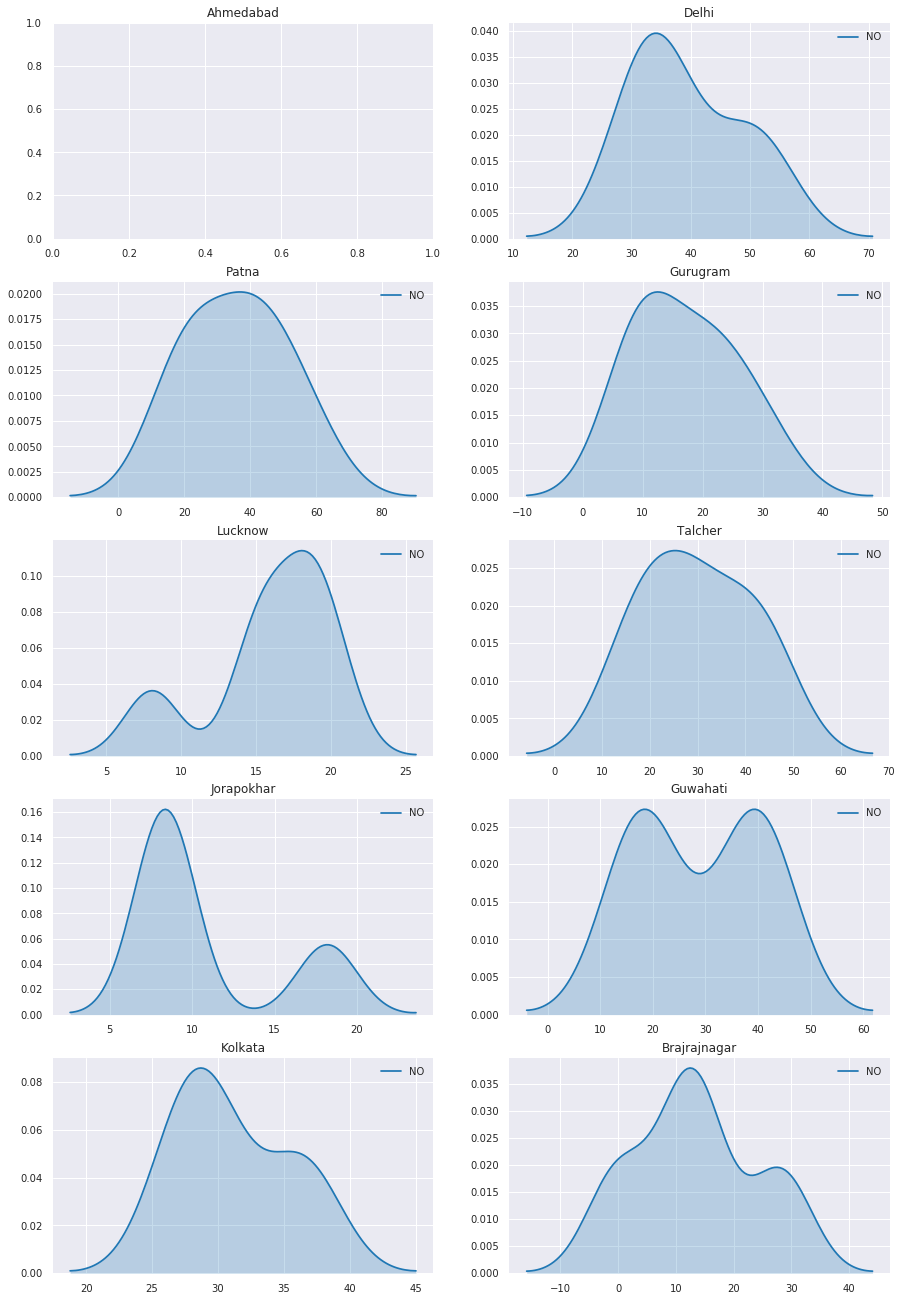

In [66]:
fig = plt.figure(figsize=(15,23))
for city,num in zip(top_cities, range(1,11)):
    df = data[data['City']==city]
    df = df.groupby('year')['NO'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.set_title(city)
    sns.kdeplot(data=df['NO'],label="NO" ,shade=True)

This shows the distribution but not the year wise data. Let's try a grouped bar plot.

I will try that tomorrow because I am out of time today